Notebook testing the decay rate implementations including a comparison against the [Kim et al paper](https://www.sciencedirect.com/science/article/pii/0039602888907765) 

Due to the geometry of the problem, the relevant decay rate is the normal one (full, non-radiative expression)

In [1]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
import miepython
import pandas as pd
import csv
from ipynb.fs.full.mie_functions import *

### $\textit{Spherical Bessel Functions (scipy routines)}$

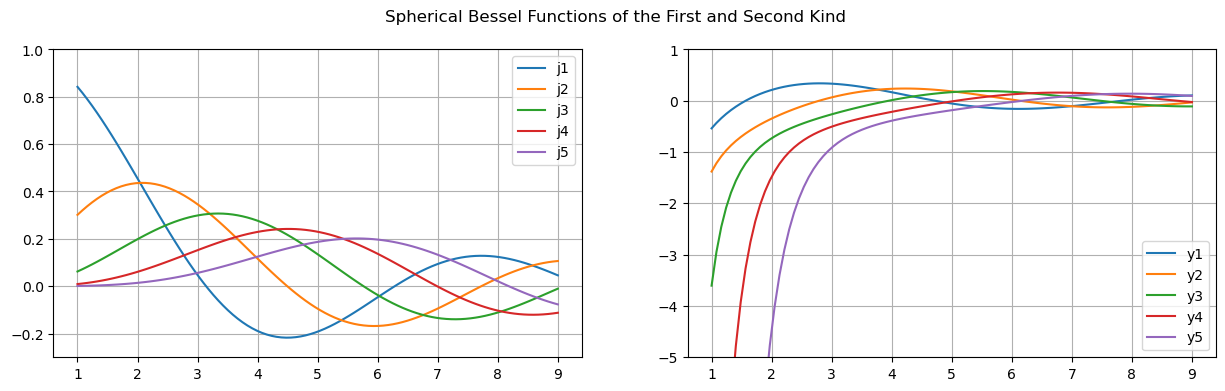

In [2]:
xvals = np.linspace(1.0, 9.0, 100)

j_1 = sp.spherical_jn(n = 0, z = xvals, derivative = False)
j_2 = sp.spherical_jn(n = 1, z = xvals, derivative = False)
j_3 = sp.spherical_jn(n = 2, z = xvals, derivative = False)
j_4 = sp.spherical_jn(n = 3, z = xvals, derivative = False)
j_5 = sp.spherical_jn(n = 4, z = xvals, derivative = False)

y_1 = sp.spherical_yn(n = 0, z = xvals, derivative = False)
y_2 = sp.spherical_yn(n = 1, z = xvals, derivative = False)
y_3 = sp.spherical_yn(n = 2, z = xvals, derivative = False)
y_4 = sp.spherical_yn(n = 3, z = xvals, derivative = False)
y_5 = sp.spherical_yn(n = 4, z = xvals, derivative = False)

fig, ax = plt.subplots(1,2, figsize = (15, 4))
ax[0].plot(xvals, j_1, label = 'j1')
ax[0].plot(xvals, j_2, label = 'j2')
ax[0].plot(xvals, j_3, label = 'j3')
ax[0].plot(xvals, j_4, label = 'j4')
ax[0].plot(xvals, j_5, label = 'j5')
ax[0].set_ylim(-0.3,1)
ax[0].grid()
ax[0].legend()

ax[1].plot(xvals, y_1, label = 'y1')
ax[1].plot(xvals, y_2, label = 'y2')
ax[1].plot(xvals, y_3, label = 'y3')
ax[1].plot(xvals, y_4, label = 'y4')
ax[1].plot(xvals, y_5, label = 'y5')
ax[1].set_ylim(-5,1)
ax[1].grid()
ax[1].legend()

fig.suptitle('Spherical Bessel Functions of the First and Second Kind')
plt.show()

### $\textit{Importing data}$

In [3]:
def import_data(filename): # filename with quotations
    
    """ Imports wavelength and index of refraction data from a csv file """
    
    df = pd.read_csv(filename, sep = ',')

    # Read values of wavelength and index of refraction

    ref_lam = df.iloc[0:,0]
    ref_n = df.iloc[0:,1]   # real part of index of refraction
    ref_k = df.iloc[0:,2]   # complex part of index of refraction

    # Convert data into numpy arrays

    ref_lam = ref_lam.to_numpy()
    ref_n = ref_n.to_numpy()
    ref_k = ref_k.to_numpy()
    return ref_lam, ref_n, ref_k

In [4]:
ref_lam_silver, ref_n_silver, ref_k_silver = import_data("McPeak_silver.csv")
m_silver = ref_n_silver + 1j * ref_k_silver
ref_lam_gold, ref_n_gold, ref_k_gold = import_data("McPeak_gold.csv")
m_gold = ref_n_gold + 1j * ref_k_gold 

### $\textit{Comparison with Kim et al paper}$

The decay rates implemented in gamma_factors() match the the rates illustrated on Fig 1 in the [Kim et al paper](https://www.sciencedirect.com/science/article/pii/0039602888907765) for the particular radius, wavelength and refractive index taken there. Note that the order of the Bessel function expansion needs to be at least 4 in order to see the expected asymptotic behaviour of the radiative rates away from the nanosphere. Note also that an increase of the expansion order is not required to match the non-radiative rates, which are the ones relevant for this project.

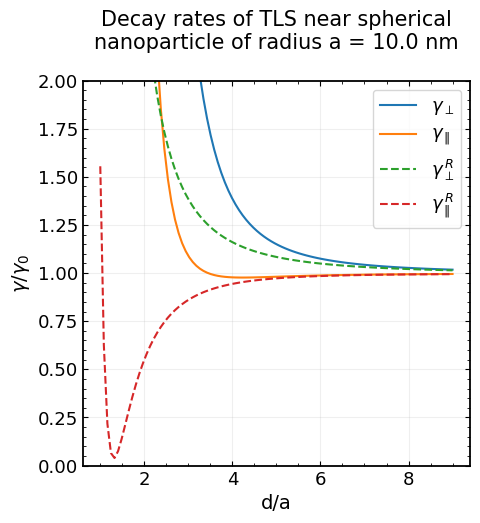

In [5]:
a = 100e-10  # 100 Ångström
lam = 4133e-10  # 4133 Ångström
mval = np.sqrt(-4.42 + 0.73j)  # complex dielectric constant of the sphere
dpoints = np.linspace(1.0, 9.0, 100) * a
A_list, B_list, gamma_norm, gamma_tang, gamma_norm_rad, gamm_tang_rad = \
gamma_factors(dpoints, ref_ind = mval, lam_val = lam, r = a, n = 1, order = 4, plot = True) 

### $\textit{Silver: wavelength of highest scattered field intensity}$

For accurate radiative rates at larger nanosphere diameters, higher order terms need to be incorporated in the Bessel function expansions (see order parameter in gamma_factors)

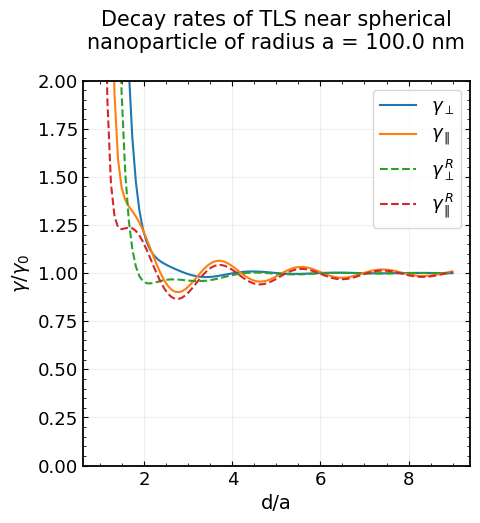

In [6]:
a = 100e-9  # 100 nm
lam = 0.36  # 360 nm (at resonance)
index = np.where(ref_lam_silver == lam)
mval = m_silver[index][0]
dpoints = np.linspace(1.0, 9.0, 100) * a
A_list, B_list, gamma_norm, gamma_tang, gamma_norm_rad, gamm_tang_rad = \
gamma_factors(dpoints, mval, lam*1e-6, a, n = 1, order = 25, plot = True) 

### $\textit{Gold}$

The 'lim' parameter in gamma_factors limits the y-axis to [0,2] to allow comparison with Kim et al. To get a better sense of the decay rates close to the surface of the nanosphere, set lim to 'False'.

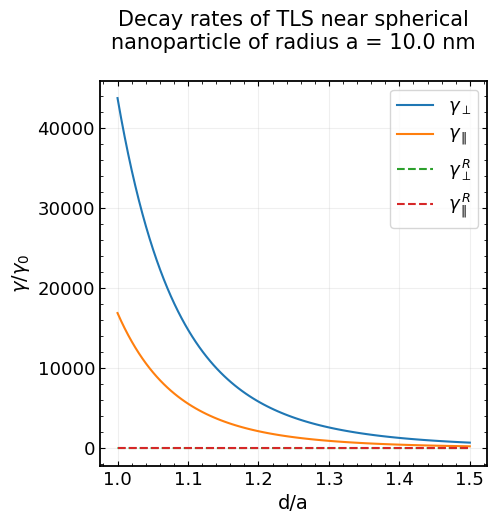

In [7]:
a = 10e-9  # 10 nm
lam = 0.52  # 520 nm (at resonance)
index = np.where(ref_lam_gold == lam)
mval = m_silver[index][0]
dpoints = np.linspace(1.0, 1.5, 100) * a
A_list, B_list, gamma_norm, gamma_tang, gamma_norm_rad, gamm_tang_rad = \
gamma_factors(dpoints, lam_val = lam*1e-6, r = a, ref_ind = 1.31 + 1j*1.46, 
              n = 1, order = 5, plot = True, lim = False) 

When the radius of the nanoparticle increases, the decay rates decrease. However, in this case the field enhancement is higher as noted in the mie_scattering_plots notebook. Therefore, there is a radius-dependent trade-off between the field enhancement and the decay rate, which must be considered for optimum enhancement by the nanoparticle.

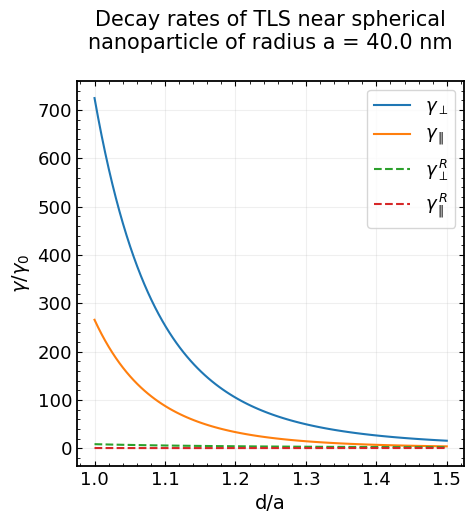

In [8]:
a = 40e-9  # 10 nm
lam = 0.52  # 520 nm (at resonance)
index = np.where(ref_lam_gold == lam)
mval = m_silver[index][0]
dpoints = np.linspace(1.0, 1.5, 100) * a
A_list, B_list, gamma_norm, gamma_tang, gamma_norm_rad, gamm_tang_rad = \
gamma_factors(dpoints, lam_val = lam*1e-6, r = a, ref_ind = 1.31 + 1j*1.46, 
              n = 1, order = 5, plot = True, lim = False) 